<a href="https://colab.research.google.com/github/phandat128/Football-player-predict/blob/main/ML_project_middle_position.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import math
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('middle.csv')
df.head(3)

,name,age,Contract valid until,Overall rating,Potential,Value,Wage,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Acceleration,Sprint speed,Agility,Reactions,Balance,Shot power,Jumping,Stamina,Strength,Long shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defensive awareness,Standing tackle,Sliding tackle,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
0,K. De Bruyne,31,2025,91,91,107500000.0,350000.0,94,85,55,93,83,86,89,83,93,90,75,73,76,91,78,92,63,89,74,91,75,65,88,94,83,88,66,66,53,15.0,13.0,5.0,10.0,13.0
1,J. Kimmich,27,2025,89,90,105500000.0,130000.0,91,68,72,87,69,82,85,73,90,85,77,60,84,88,84,78,79,94,68,83,89,85,80,85,50,85,83,85,78,8.0,15.0,7.0,15.0,15.0
2,F. de Jong,25,2026,87,90,104500000.0,230000.0,78,72,72,91,70,87,84,64,89,89,80,83,87,88,79,68,76,89,74,66,74,82,77,88,53,90,76,76,77,7.0,13.0,10.0,10.0,9.0


In [ ]:
df.drop(['name', 'age', 'Overall rating', 'Potential', 'Wage', 'Heading accuracy', 'Standing tackle', 'Sliding tackle', 'Contract valid until', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes'], axis=1, inplace=True)

In [ ]:
df.isnull().sum()

Value                  0
Crossing               0
Finishing              0
Short passing          0
Volleys                0
Dribbling              0
Curve                  0
FK Accuracy            0
Long passing           0
Ball control           0
Acceleration           0
Sprint speed           0
Agility                0
Reactions              0
Balance                0
Shot power             0
Jumping                0
Stamina                0
Strength               0
Long shots             0
Aggression             0
Interceptions          0
Positioning            0
Vision                 0
Penalties              0
Composure              0
Defensive awareness    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
numeric_columns = df.select_dtypes('number').columns
for column in numeric_columns:
  if column == 'Value': continue
  df[column] = df[column]/100
df['Value'] = np.log(df['Value'])

In [ ]:
df.describe()

,Value,Crossing,Finishing,Short passing,Volleys,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Acceleration,Sprint speed,Agility,Reactions,Balance,Shot power,Jumping,Stamina,Strength,Long shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defensive awareness
count,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000
mean,15.927171,0.679009,0.643130,0.755722,0.589463,0.754519,0.674046,0.595870,0.704713,0.765009,0.733333,0.719213,0.746009,0.731315,0.732611,0.719444,0.655204,0.744528,0.665667,0.670426,0.665222,0.600778,0.695602,0.717454,0.596648,0.723296,0.593028
std,0.990787,0.093479,0.114635,0.059670,0.125777,0.066096,0.112869,0.132439,0.085329,0.054460,0.103280,0.109692,0.093588,0.065199,0.101059,0.089341,0.117678,0.096341,0.111662,0.111474,0.131819,0.181764,0.086833,0.080798,0.111122,0.075617,0.165849
min,14.403297,0.220000,0.190000,0.430000,0.210000,0.390000,0.270000,0.240000,0.310000,0.590000,0.320000,0.330000,0.320000,0.440000,0.320000,0.260000,0.300000,0.320000,0.290000,0.260000,0.250000,0.120000,0.230000,0.410000,0.240000,0.470000,0.170000
25%,15.096444,0.630000,0.580000,0.720000,0.500000,0.720000,0.607500,0.500000,0.650000,0.730000,0.670000,0.660000,0.680000,0.690000,0.680000,0.670000,0.580000,0.690000,0.600000,0.610000,0.580000,0.457500,0.650000,0.670000,0.520000,0.670000,0.460000
50%,15.761421,0.680000,0.670000,0.760000,0.590000,0.760000,0.690000,0.600000,0.710000,0.760000,0.750000,0.730000,0.750000,0.730000,0.740000,0.730000,0.660000,0.760000,0.680000,0.690000,0.690000,0.670000,0.700000,0.720000,0.590000,0.730000,0.650000
75%,16.733281,0.750000,0.720000,0.790000,0.690000,0.800000,0.760000,0.700000,0.760000,0.800000,0.790000,0.790000,0.810000,0.770000,0.800000,0.780000,0.740000,0.810000,0.750000,0.750000,0.760000,0.740000,0.750000,0.770000,0.670000,0.770000,0.720000
max,18.493001,0.940000,0.890000,0.930000,0.880000,0.920000,0.930000,0.940000,0.930000,0.930000,0.960000,0.960000,0.950000,0.930000,0.950000,0.930000,0.930000,0.950000,0.910000,0.910000,0.920000,0.890000,0.940000,0.940000,0.900000,0.940000,0.900000


###Utility function

In [ ]:
def scatterPlotToTarget(columns, target, ncolumns=3):
  nrows = math.ceil(len(columns)/ncolumns)
  fig, axs = plt.subplots(nrows, ncolumns, figsize=(5*ncolumns, nrows*5))
  for i in range(nrows):
    for j in range(ncolumns):
      col_index = i*ncolumns + j
      if col_index >= len(columns): break
      axs[i,j].scatter(x=df[columns[col_index]], y=df[target])
      axs[i,j].set_title(columns[col_index])
      axs[i,j].margins(0.5)
      #correlation
      correlation = df[target].corr(df[columns[col_index]])
      axs[i,j].annotate(f'corr: {correlation}', (0.8, 0.2), xycoords='axes fraction', ha='center', va='center')
  fig.tight_layout()

In [ ]:
def plot_boxplot(columns, title, ncolumns=3):
  nrows = math.ceil(len(columns)/ncolumns)
  fig, axs = plt.subplots(nrows, ncolumns, figsize=(5*ncolumns, nrows*5))
  fig.suptitle(title)
  for i in range(nrows):
    for j in range(ncolumns):
      col_index = i*ncolumns + j
      if col_index >= len(columns): break
      axs[i,j].boxplot(x=df[columns[col_index]])
      axs[i,j].set_title(columns[col_index])
      axs[i,j].margins(0.5)
  fig.tight_layout()

In [ ]:
# adjust outliers
def outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    Lower_fence = Q1 - (1.5*IQR)
    print(f"Lower fence is = {Lower_fence}")

    Higher_fence = Q3 + (1.5*IQR)
    print(f"Higher fence is = {Higher_fence}")


    #With the help of "index" function here we are getting all the indexes of Lower_fence and Higher_fence

    IndexL_Outlier = data[data[column] < Lower_fence ].index
    IndexH_Outlier = data[data[column] > Higher_fence].index

    group_df = data.groupby(np.arange(len(data.index))//10, axis=0).mean()
    for i in IndexL_Outlier:
      data[column][i] = group_df[column][i//10]
    for i in IndexH_Outlier:
      data[column][i] = group_df[column][i//10]

    print(f'Applied to {len(IndexL_Outlier) + len(IndexH_Outlier)} row(s) of {column} column')

###Next

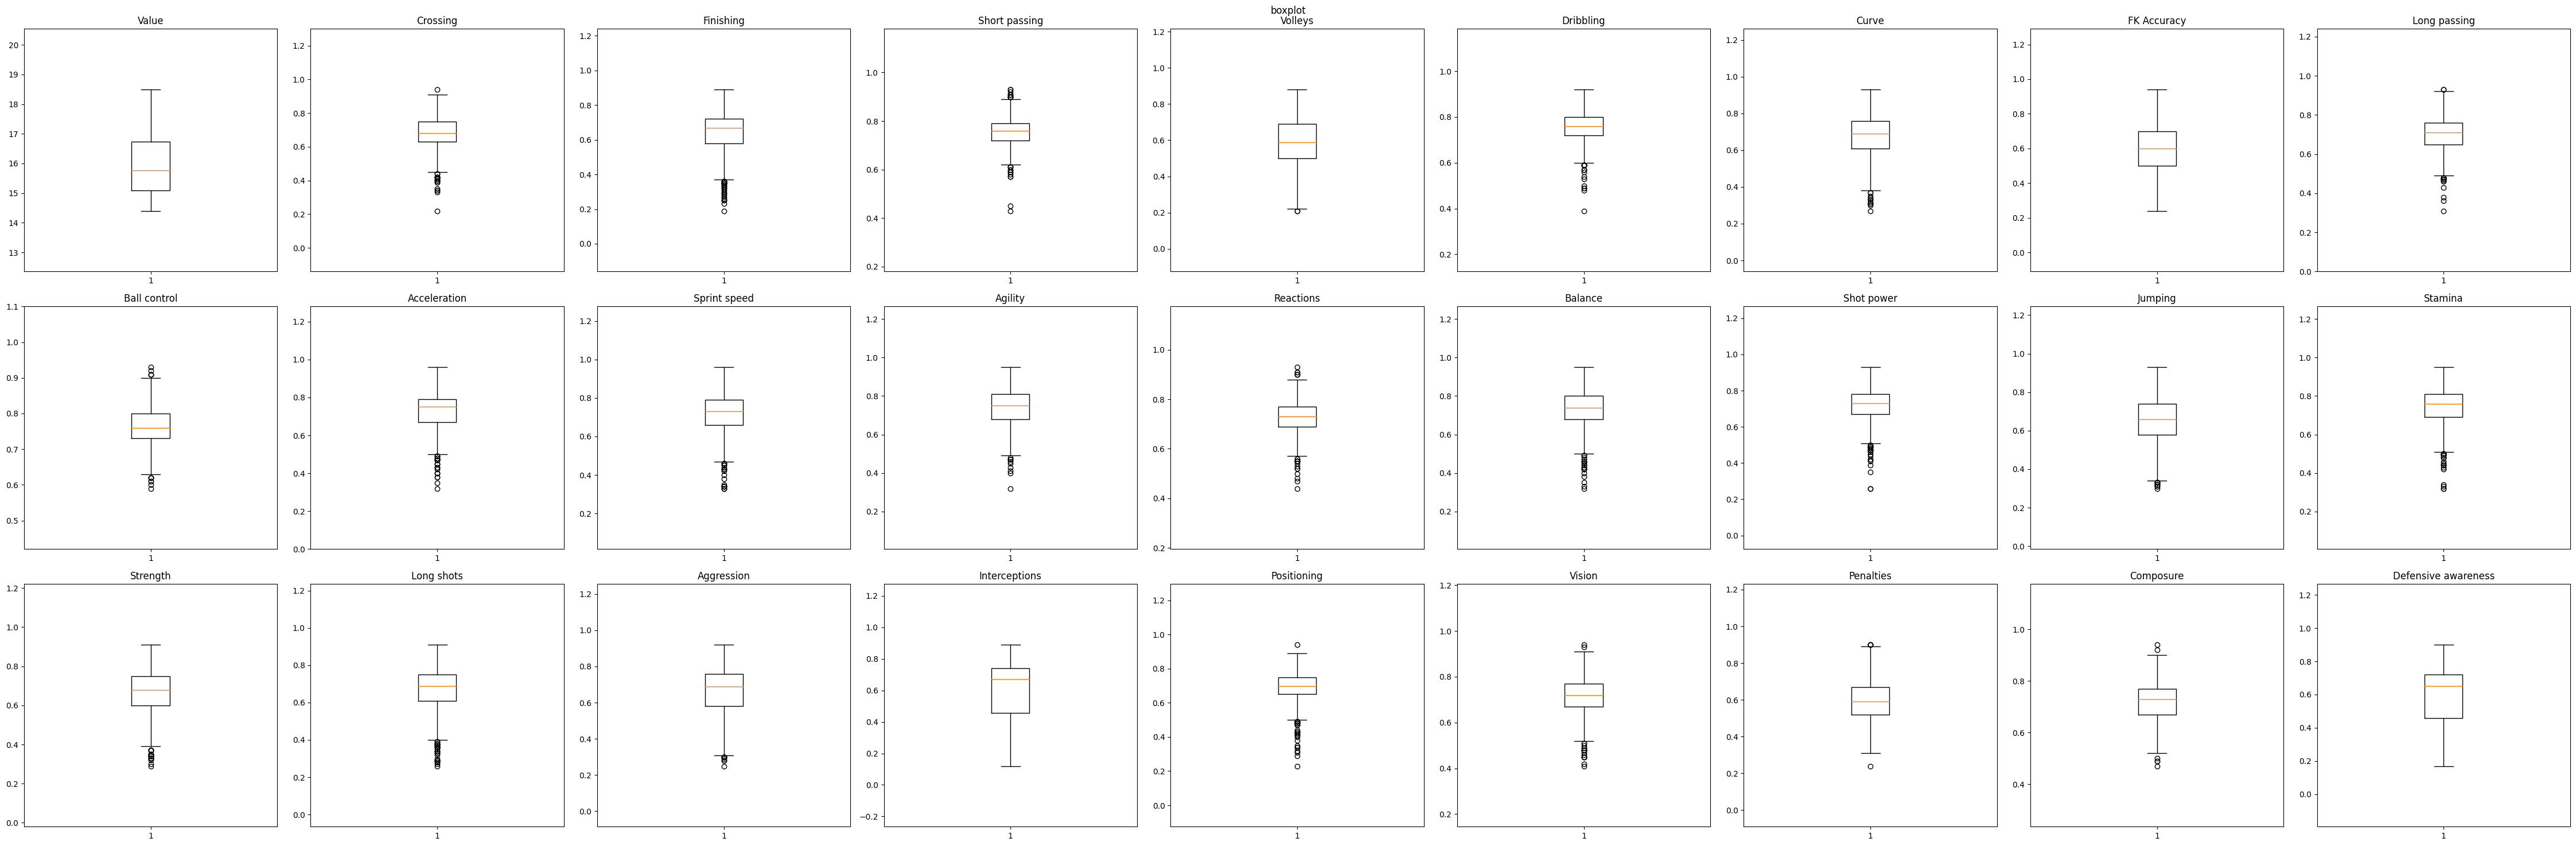

In [ ]:
plot_boxplot(numeric_columns, "boxplot", 9)

In [ ]:
for column in df.columns:
  outliers(df, column)

Lower fence is = 12.641189073493017
Higher fence is = 19.188536619981875
Applied to 0 row(s) of Value column
Lower fence is = 0.45
Higher fence is = 0.9299999999999999
Applied to 20 row(s) of Crossing column
Lower fence is = 0.36999999999999994
Higher fence is = 0.9299999999999999
Applied to 29 row(s) of Finishing column
Lower fence is = 0.6149999999999999
Higher fence is = 0.8950000000000001
Applied to 25 row(s) of Short passing column
Lower fence is = 0.21500000000000008
Higher fence is = 0.9749999999999999
Applied to 2 row(s) of Volleys column
Lower fence is = 0.5999999999999999
Higher fence is = 0.9200000000000002
Applied to 18 row(s) of Dribbling column
Lower fence is = 0.3787499999999998
Higher fence is = 0.9887500000000001
Applied to 12 row(s) of Curve column
Lower fence is = 0.20000000000000007
Higher fence is = 0.9999999999999999
Applied to 0 row(s) of FK Accuracy column
Lower fence is = 0.48500000000000004
Higher fence is = 0.925
Applied to 16 row(s) of Long passing column
Lo

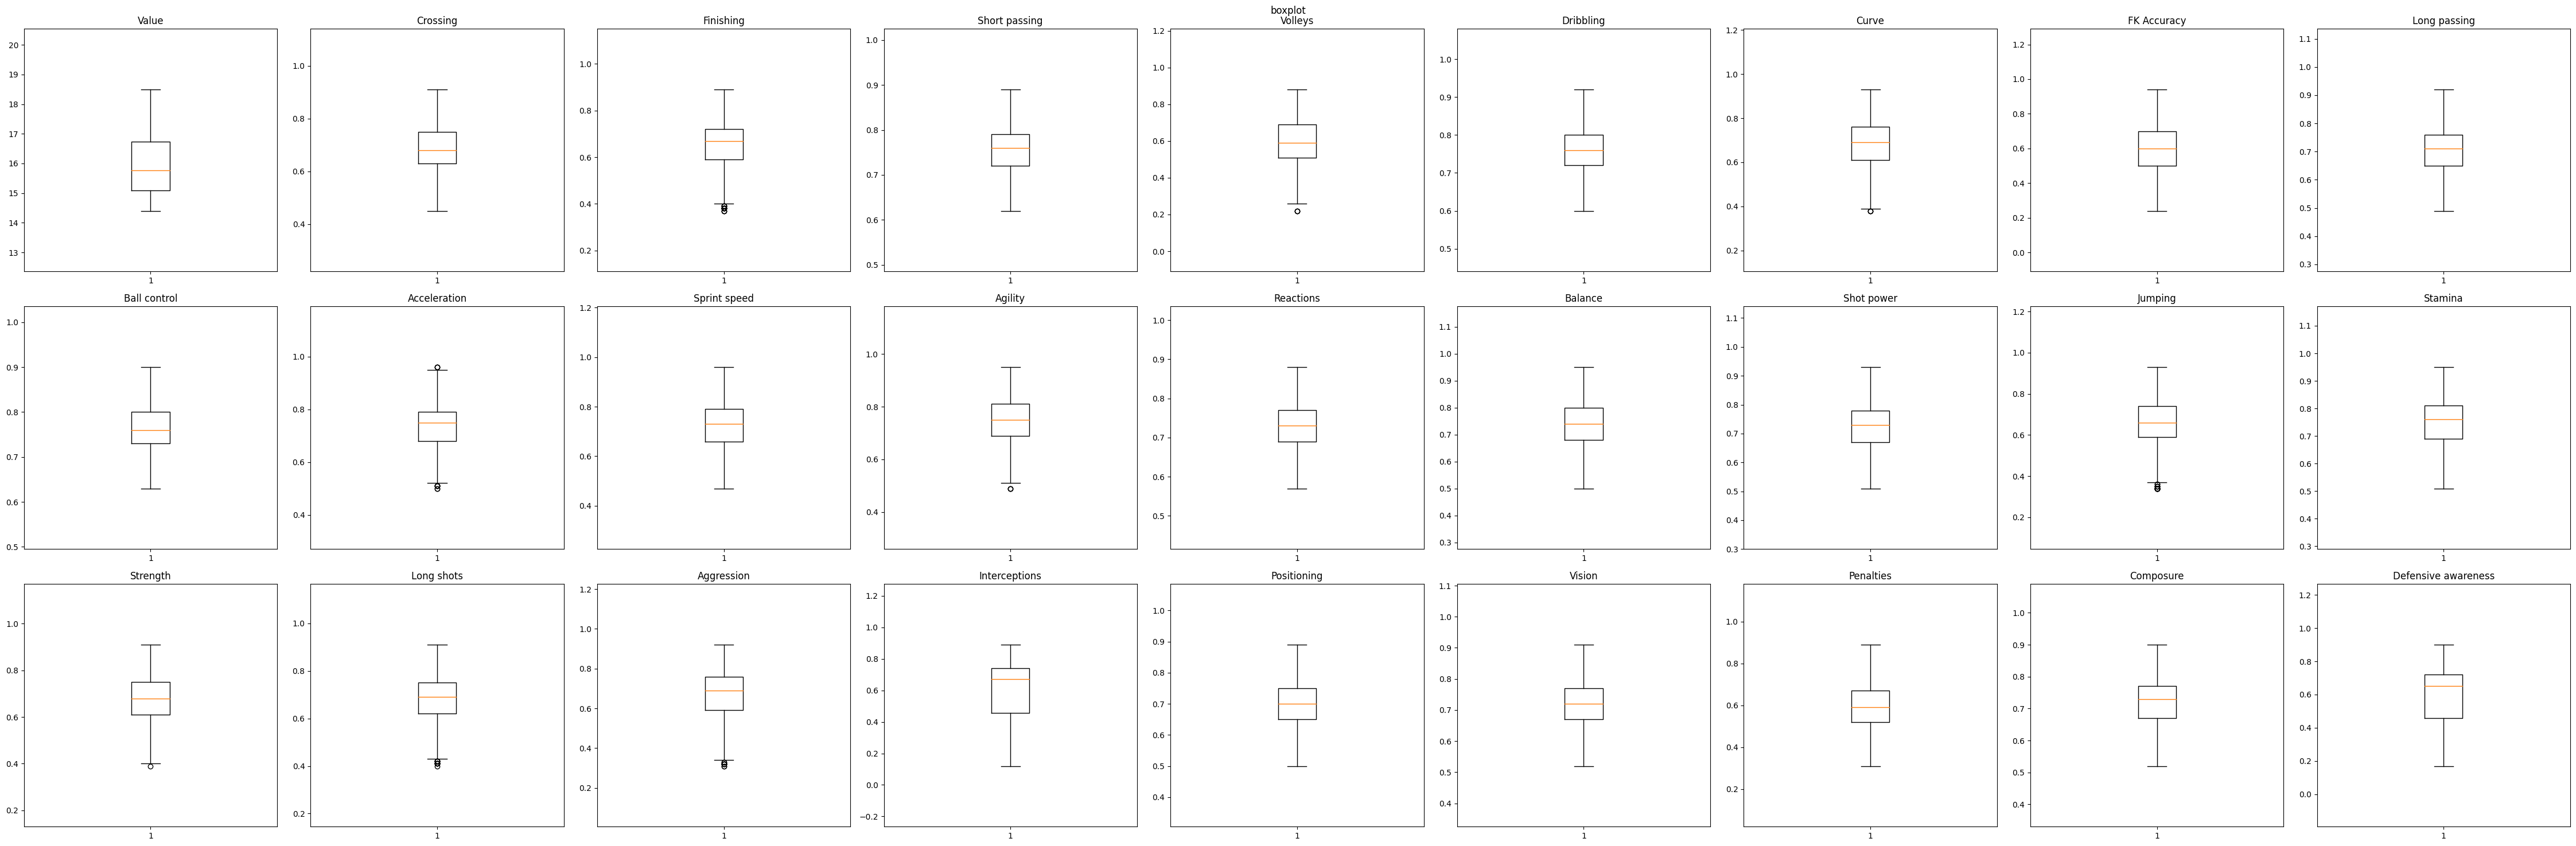

In [ ]:
plot_boxplot(numeric_columns, "boxplot", 9)

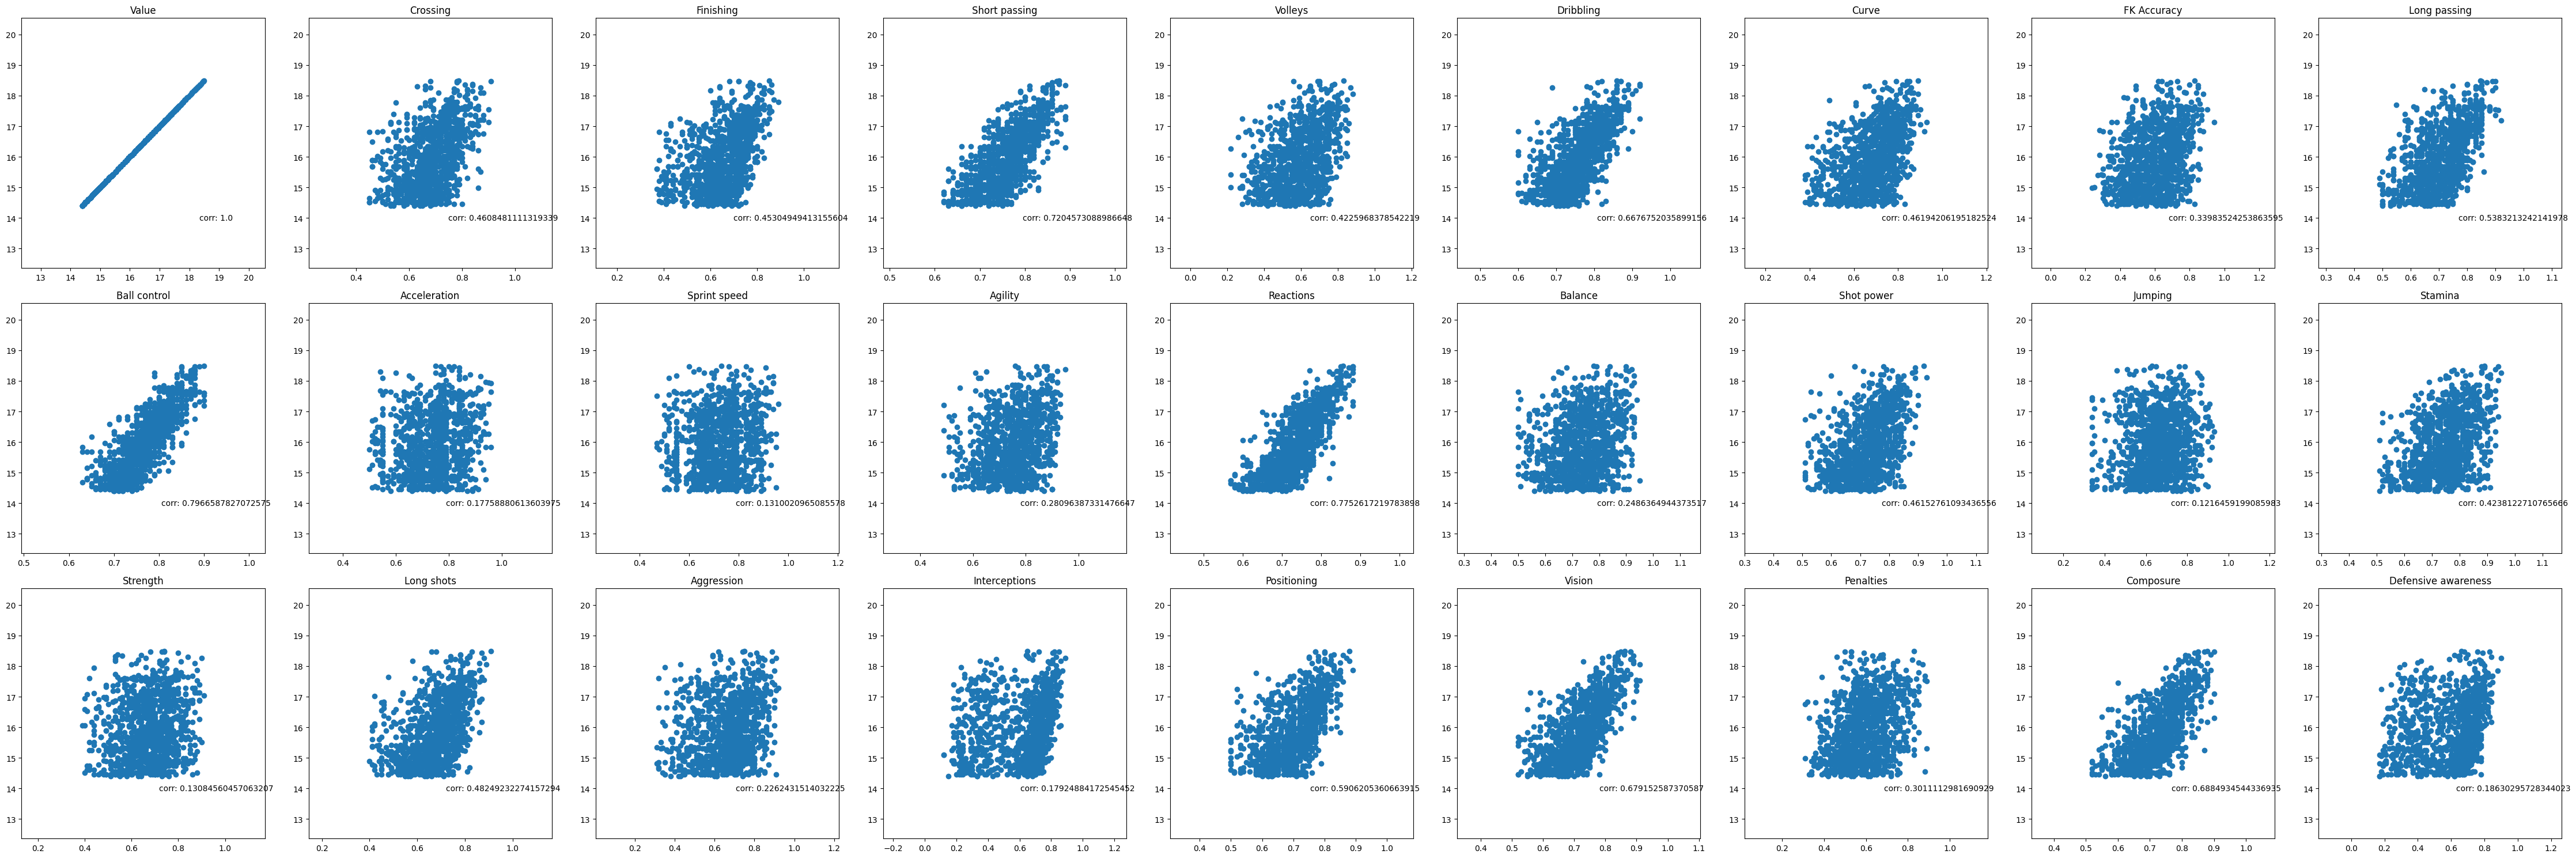

In [ ]:
scatterPlotToTarget(numeric_columns, target='Value', ncolumns=9)

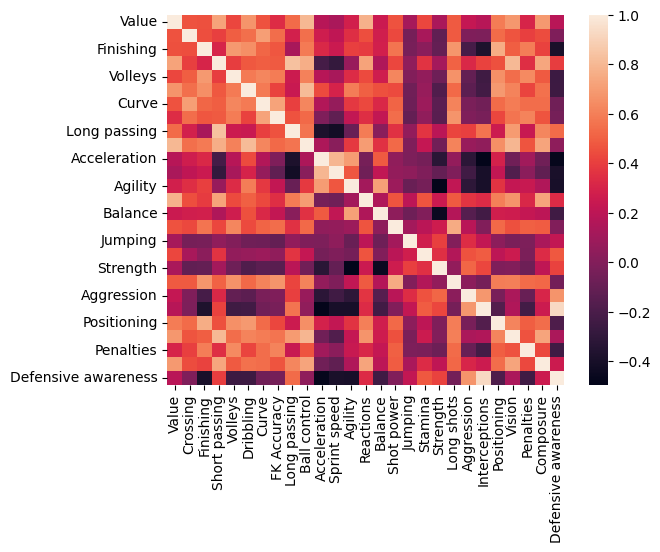

In [ ]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False)
plt.show()

In [ ]:
correlation_matrix

,Value,Crossing,Finishing,Short passing,Volleys,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Acceleration,Sprint speed,Agility,Reactions,Balance,Shot power,Jumping,Stamina,Strength,Long shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defensive awareness
Value,1.000000,0.460848,0.453049,0.720457,0.422597,0.667675,0.461942,0.339835,0.538321,0.796659,0.177589,0.131002,0.280964,0.775262,0.248636,0.461528,0.121646,0.423812,0.130846,0.482492,0.226243,0.179249,0.590621,0.679153,0.301111,0.688493,0.186303
Crossing,0.460848,1.000000,0.446939,0.398721,0.496141,0.545949,0.707692,0.542812,0.285012,0.548290,0.268152,0.206248,0.341827,0.447043,0.273497,0.429201,-0.043956,0.125317,-0.121312,0.481648,-0.015691,-0.019304,0.538475,0.463988,0.402799,0.444015,-0.012025
Finishing,0.453049,0.446939,1.000000,0.302540,0.684993,0.652053,0.520446,0.469793,0.128716,0.581109,0.320279,0.246700,0.400730,0.389169,0.277497,0.563024,-0.034362,0.029037,-0.106720,0.674333,-0.218858,-0.378362,0.756142,0.497035,0.595440,0.412437,-0.391188
Short passing,0.720457,0.398721,0.302540,1.000000,0.396078,0.474809,0.492686,0.485393,0.833587,0.766371,-0.222414,-0.290747,0.072507,0.724117,0.150645,0.426542,0.043747,0.358190,0.117877,0.508774,0.319312,0.411876,0.455611,0.804670,0.340282,0.736100,0.397306
Volleys,0.422597,0.496141,0.684993,0.396078,1.000000,0.585183,0.620814,0.586752,0.253358,0.606227,0.181873,0.128331,0.331558,0.434201,0.267696,0.622075,-0.001086,0.051358,-0.071086,0.663530,-0.112848,-0.248427,0.660067,0.544185,0.633352,0.484752,-0.257843
Dribbling,0.667675,0.545949,0.652053,0.474809,0.585183,1.000000,0.581501,0.415293,0.241664,0.808194,0.435622,0.294128,0.595562,0.499385,0.455396,0.438800,-0.064674,0.067840,-0.182808,0.530334,-0.135658,-0.237741,0.685528,0.609839,0.421706,0.550881,-0.251317
Curve,0.461942,0.707692,0.520446,0.492686,0.620814,0.581501,1.000000,0.722901,0.401234,0.622687,0.159268,0.062138,0.376770,0.432893,0.318334,0.511301,-0.072247,0.086314,-0.142777,0.610854,-0.029883,-0.061542,0.534084,0.590084,0.541631,0.538690,-0.067296
FK Accuracy,0.339835,0.542812,0.469793,0.485393,0.586752,0.415293,0.722901,1.000000,0.458206,0.529289,-0.015573,-0.123702,0.218556,0.341399,0.221263,0.538677,-0.107722,0.043769,-0.147600,0.670456,-0.013524,-0.037238,0.423508,0.567691,0.612650,0.468331,-0.049877
Long passing,0.538321,0.285012,0.128716,0.833587,0.253358,0.241664,0.401234,0.458206,1.000000,0.567216,-0.383806,-0.420890,-0.097068,0.586644,0.022435,0.352382,0.053679,0.367182,0.193262,0.421202,0.403669,0.566671,0.254333,0.693754,0.239868,0.624024,0.534309
Ball control,0.796659,0.548290,0.581109,0.766371,0.606227,0.808194,0.622687,0.529289,0.567216,1.000000,0.145311,0.019414,0.382066,0.699179,0.352323,0.528296,-0.010790,0.225215,-0.057170,0.611825,0.074387,0.043147,0.652818,0.791206,0.463867,0.729662,0.040761


In [ ]:
from sklearn.model_selection import train_test_split

y = df['Value']
X = df.drop(['Value'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_validate

models = {
    'linear_regression': LinearRegression(),
    'mlp_model': MLPRegressor((50, 50), activation='relu'),
    'decision_tree': DecisionTreeRegressor(),
    'random_forest': RandomForestRegressor(100)
}
reg_linear_models = {
    'ridge_regression': Ridge(),
    'lasso_regression': Lasso(),
}

for (model_name, model) in models.items():
  cv_results = cross_validate(model, X_train, y_train, cv=5, return_estimator=True)
  y_pred = [estimator.predict(X_test) for estimator in cv_results['estimator']]
  y_pred = np.average(y_pred, axis=0)
  print(model_name)
  print('MAE: ', mean_absolute_error(y_test, y_pred))
  print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
  print('r2 score: ', r2_score(y_test, y_pred))
  print()

linear_regression
MAE:  0.3513965809082938
RMSE:  0.45536059438509113
r2 score:  0.7996798612009361

mlp_model
MAE:  0.40876216298849466
RMSE:  0.520611487883214
r2 score:  0.7381568505525047

decision_tree
MAE:  0.3828988184424793
RMSE:  0.4727188711273123
r2 score:  0.7841164248624282

random_forest
MAE:  0.3282684661335118
RMSE:  0.4149580660993454
r2 score:  0.8336502533376697



In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'ridge_regression': {'alpha': np.arange(0.01, 0.1, 0.01)},
    'lasso_regression': {'alpha': np.arange(0.0001, 0.001, 0.0001)}
}

for (model_name, model) in reg_linear_models.items():
  grid_search = GridSearchCV(model, param_grid[model_name], scoring='r2')
  grid_search.fit(X_train, y_train)
  reg_linear_models[model_name] = grid_search.best_estimator_
  reg_linear_models[model_name].fit(X_train, y_train)
  y_pred = reg_linear_models[model_name].predict(X_test)
  print(reg_linear_models[model_name])
  print('MAE: ', mean_absolute_error(y_test, y_pred))
  print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
  print('r2 score: ', r2_score(y_test, y_pred))
  print()

Ridge(alpha=0.04)
MAE:  0.35121113050007924
RMSE:  0.4546167827515613
r2 score:  0.8003337550979616

Lasso(alpha=0.0002)
MAE:  0.35279018978392923
RMSE:  0.45645428238472646
r2 score:  0.7987164452279459



In [ ]:
models['random_forest'].fit(X_train, y_train)
y_pred = models['random_forest'].predict(X_test)
pd.DataFrame(zip(y_test, y_pred), columns=['target', 'predict'])

,target,predict
0,16.166886,16.328671
1,15.761421,15.385094
2,15.297115,14.867193
3,15.687313,15.078968
4,14.457364,14.980541
...,...,...
211,14.978661,14.829368
212,14.845130,15.010016
213,15.250595,15.016300
214,16.213406,16.610065


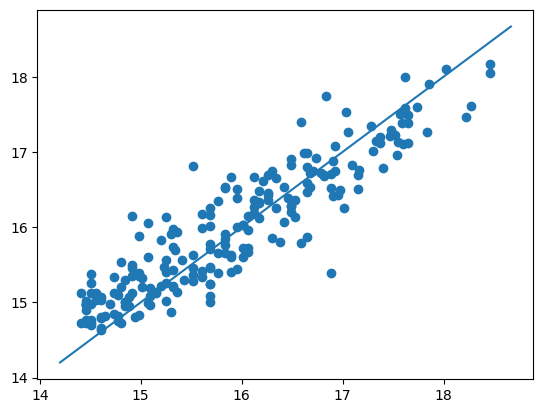

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot(plt.xlim(), plt.xlim())